In [28]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')

In [30]:
os.chdir('/content/gdrive/MyDrive/CourseDA')
os.listdir()

['train_mobile_price.csv',
 'test_mobile_price.csv',
 'loan_data.csv',
 'healthcare-dataset-stroke-data.csv',
 'diabetes_prediction_dataset_.csv',
 'diabetes_prediction_dataset.csv',
 'movies_metadata.csv',
 'ratings_small.csv',
 'AIDS_Classification_50000.csv',
 'heart-dt.csv',
 'Churn_Modelling.csv',
 'bank.csv',
 'ds_salaries.csv']

# **Tentang Kumpulan Data**
Dataset Gaji Pekerjaan Ilmu Data berisi 11 kolom, masing-masing adalah:

work_year: Tahun gaji dibayarkan.\
experience_level: Tingkat pengalaman dalam pekerjaan selama tahun tersebut.\
jenis_pekerjaan: Jenis pekerjaan untuk peran tersebut.\
job_title: Peran yang dikerjakan sepanjang tahun.\
gaji: Jumlah total gaji kotor yang dibayarkan.\
gaji_mata uang: Mata uang gaji yang dibayarkan sebagai kode mata uang ISO 4217.\
gajiinusd: Gaji dalam USD\
Employee_residence: Negara tempat tinggal utama karyawan selama tahun kerja sesuai kode negara ISO 3166.\
remote_ratio: Jumlah keseluruhan pekerjaan yang dilakukan dari jarak jauh.\
company_location: Negara kantor utama pemberi kerja atau cabang yang mengontrak.\
ukuran_perusahaan: Jumlah rata-rata orang yang bekerja di perusahaan sepanjang tahun.\

In [31]:
df=pd.read_csv('ds_salaries.csv')
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


In [32]:
df[df.duplicated()]

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
115,2023,SE,FT,Data Scientist,150000,USD,150000,US,0,US,M
123,2023,SE,FT,Analytics Engineer,289800,USD,289800,US,0,US,M
153,2023,MI,FT,Data Engineer,100000,USD,100000,US,100,US,M
154,2023,MI,FT,Data Engineer,70000,USD,70000,US,100,US,M
160,2023,SE,FT,Data Engineer,115000,USD,115000,US,0,US,M
...,...,...,...,...,...,...,...,...,...,...,...
3439,2022,MI,FT,Data Scientist,78000,USD,78000,US,100,US,M
3440,2022,SE,FT,Data Engineer,135000,USD,135000,US,100,US,M
3441,2022,SE,FT,Data Engineer,115000,USD,115000,US,100,US,M
3586,2021,MI,FT,Data Engineer,200000,USD,200000,US,100,US,L


In [33]:
str(df)

'      work_year experience_level employment_type                 job_title  \\\n0          2023               SE              FT  Principal Data Scientist   \n1          2023               MI              CT               ML Engineer   \n2          2023               MI              CT               ML Engineer   \n3          2023               SE              FT            Data Scientist   \n4          2023               SE              FT            Data Scientist   \n...         ...              ...             ...                       ...   \n3750       2020               SE              FT            Data Scientist   \n3751       2021               MI              FT  Principal Data Scientist   \n3752       2020               EN              FT            Data Scientist   \n3753       2020               EN              CT     Business Data Analyst   \n3754       2021               SE              FT      Data Science Manager   \n\n       salary salary_currency  salary_in_usd emp

# **1. Analisis Gaji**
Bagaimana distribusi gaji (dalam USD) di berbagai tingkat pengalaman (experience_level)?
- Menemukan apakah ada perbedaan signifikan dalam gaji berdasarkan tingkat pengalaman.

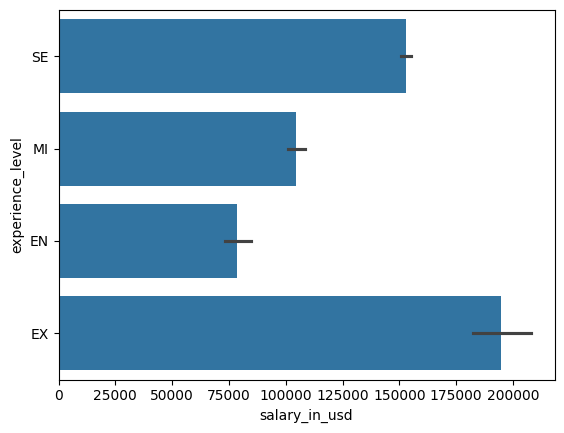

In [34]:
sns.barplot(df,
             x='salary_in_usd',
             y='experience_level')
plt.show()

Apakah ada tren gaji berdasarkan tahun (work_year)?
- Melihat apakah ada kenaikan atau penurunan gaji dari tahun ke tahun.

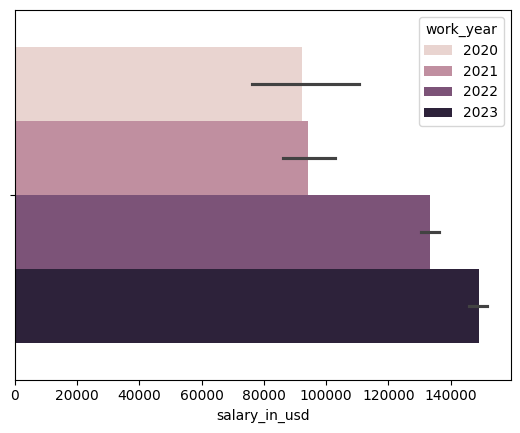

In [35]:
sns.barplot(df,
             x='salary_in_usd',
             hue='work_year')
plt.show()

Bagaimana perbedaan gaji di berbagai negara (employee_residence dan company_location)?
- Menemukan variasi gaji berdasarkan lokasi tempat tinggal karyawan dan lokasi perusahaan.

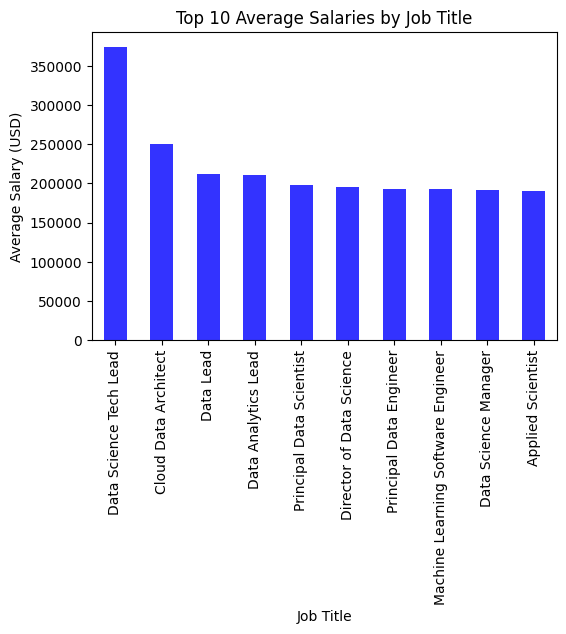

In [36]:
plt.figure(figsize=(6, 4))
avg_salary_by_title = df.groupby('job_title')['salary_in_usd'].mean().sort_values(ascending=False)[:10]
avg_salary_by_title.plot(kind='bar', color='blue', alpha=0.8)
plt.title('Top 10 Average Salaries by Job Title')
plt.xlabel('Job Title')
plt.ylabel('Average Salary (USD)')
plt.xticks(rotation=90)
plt.show()

# **2. Analisis Jenis dan Peran Pekerjaan**
Apa jenis pekerjaan (employment_type) yang paling umum di industri ilmu data?
- Menentukan distribusi jenis pekerjaan dalam dataset.

<Axes: xlabel='employment_type'>

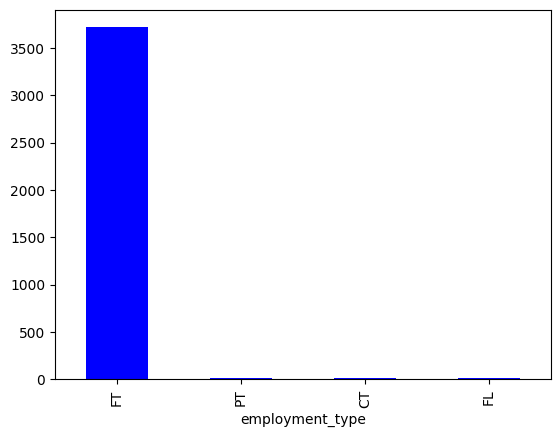

In [37]:
df['employment_type'].value_counts().plot(kind='bar', color='blue')

Bagaimana variasi gaji di berbagai peran pekerjaan (job_title)?
- Mengidentifikasi peran pekerjaan mana yang membayar paling tinggi dan paling rendah.

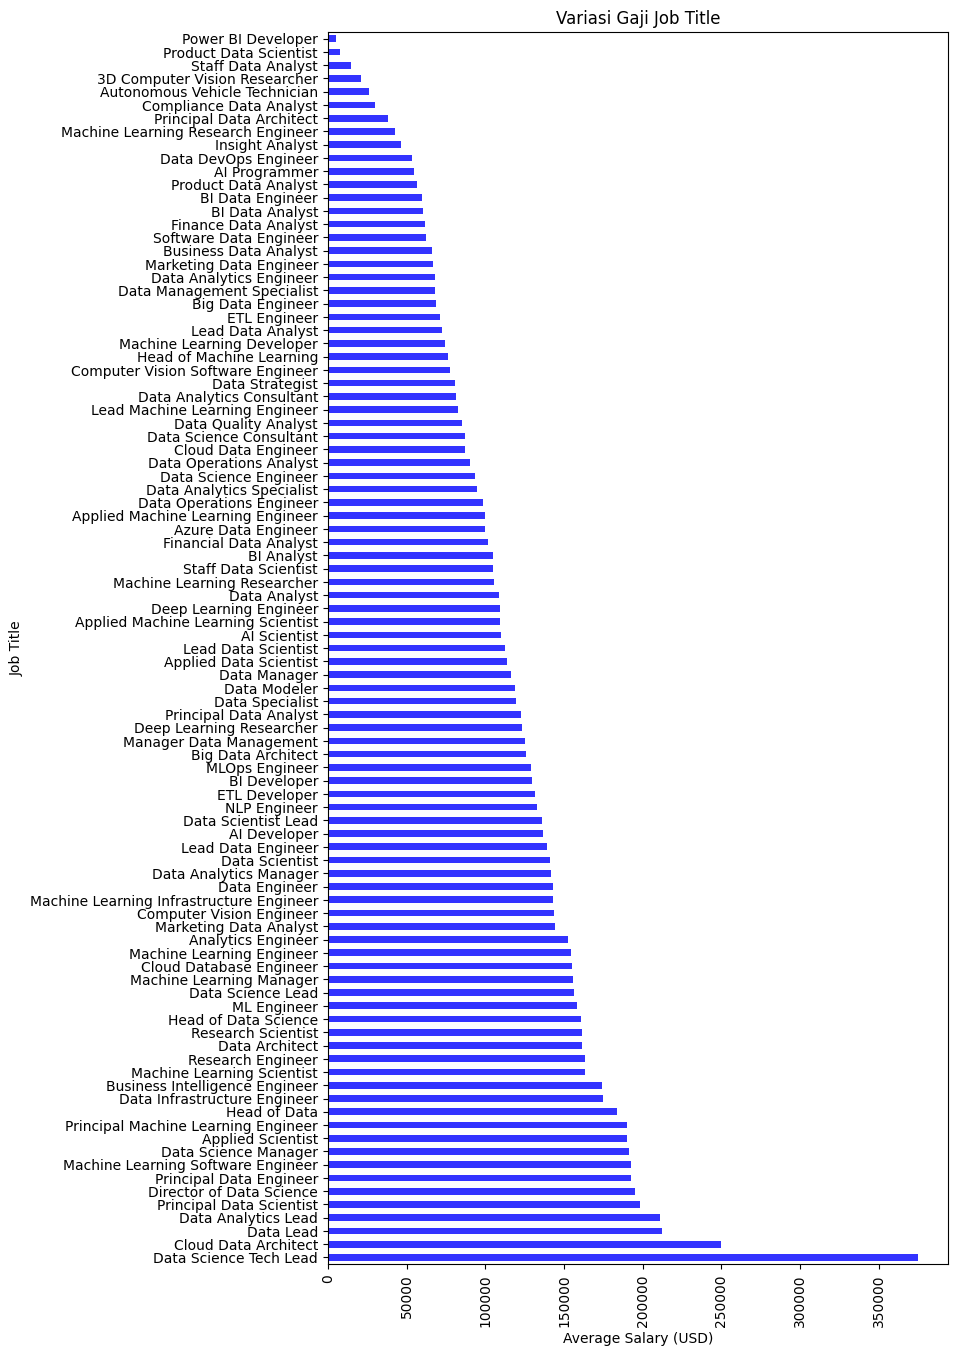

In [38]:
plt.figure(figsize=(8, 16))
avg_salary_by_title = df.groupby('job_title')['salary_in_usd'].mean().sort_values(ascending=False)
avg_salary_by_title.plot(kind='barh', color='blue', alpha=0.8)
plt.title('Variasi Gaji Job Title')
plt.xlabel('Average Salary (USD)')
plt.ylabel('Job Title')
plt.xticks(rotation=90)
plt.show()

Bagaimana remote_ratio mempengaruhi gaji?
- Apakah pekerjaan jarak jauh memiliki gaji yang berbeda dibandingkan pekerjaan di kantor.

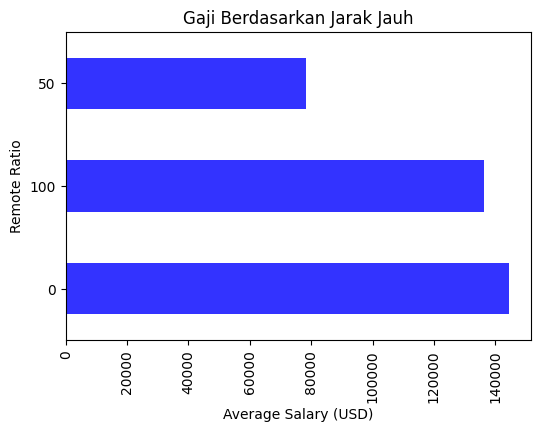

In [39]:
plt.figure(figsize=(6, 4))
avg_salary_by_title = df.groupby('remote_ratio')['salary_in_usd'].mean().sort_values(ascending=False)
avg_salary_by_title.plot(kind='barh', color='blue', alpha=0.8)
plt.title('Gaji Berdasarkan Jarak Jauh')
plt.xlabel('Average Salary (USD)')
plt.ylabel('Remote Ratio')
plt.xticks(rotation=90)
plt.show()

# **3. Analisis Perusahaan**
Bagaimana ukuran perusahaan (company_size) mempengaruhi gaji?
- Menganalisis apakah perusahaan besar membayar lebih baik daripada perusahaan kecil.

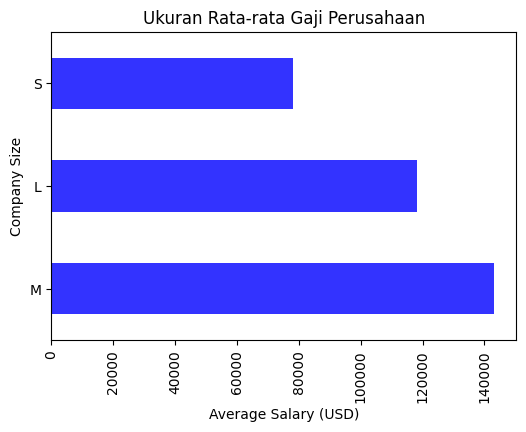

In [40]:
plt.figure(figsize=(6, 4))
avg_salary_by_title = df.groupby('company_size')['salary_in_usd'].mean().sort_values(ascending=False)
avg_salary_by_title.plot(kind='barh', color='blue', alpha=0.8)
plt.title('Ukuran Rata-rata Gaji Perusahaan')
plt.xlabel('Average Salary (USD)')
plt.ylabel('Company Size')
plt.xticks(rotation=90)
plt.show()

Apakah ada hubungan antara lokasi perusahaan (company_location) dan remote_ratio?
- Menentukan apakah perusahaan di lokasi tertentu lebih cenderung menawarkan pekerjaan jarak jauh.

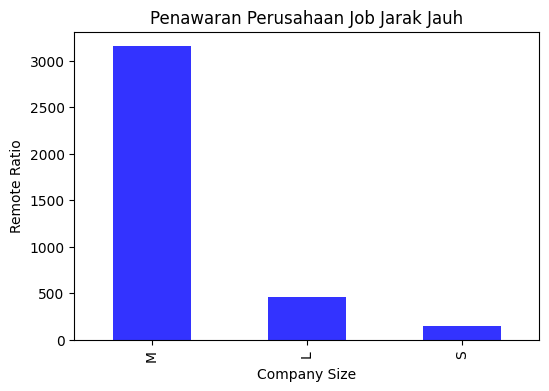

In [41]:
plt.figure(figsize=(6, 4))
avg_salary_by_title = df.groupby('company_size')['remote_ratio'].count().sort_values(ascending=False)
avg_salary_by_title.plot(kind='bar', color='blue', alpha=0.8)
plt.title('Penawaran Perusahaan Job Jarak Jauh')
plt.xlabel('Company Size')
plt.ylabel('Remote Ratio')
plt.xticks(rotation=90)
plt.show()

# **4. Analisis Mata Uang**
Bagaimana distribusi mata uang gaji (salary_currency)?
- Mengetahui mata uang yang paling umum digunakan untuk membayar gaji dalam dataset ini.

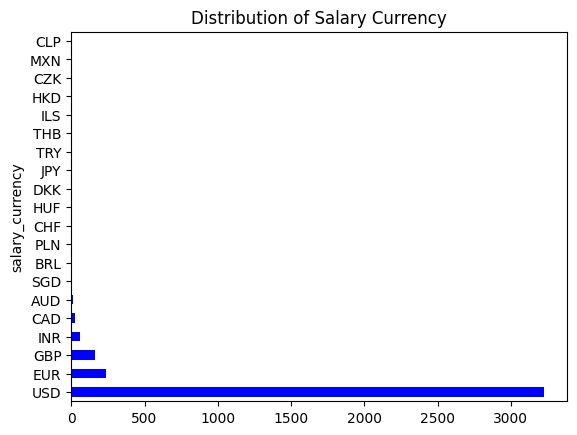

In [42]:
df['salary_currency'].value_counts().plot(kind='barh', color='blue')
plt.title('Distribution of Salary Currency')
plt.show()

# **5. Tren dan Perbandingan Global**
Bagaimana tren pekerjaan dan gaji di berbagai negara?
- Menentukan apakah ada negara yang lebih cenderung memiliki peran tertentu atau tingkat gaji yang lebih tinggi.

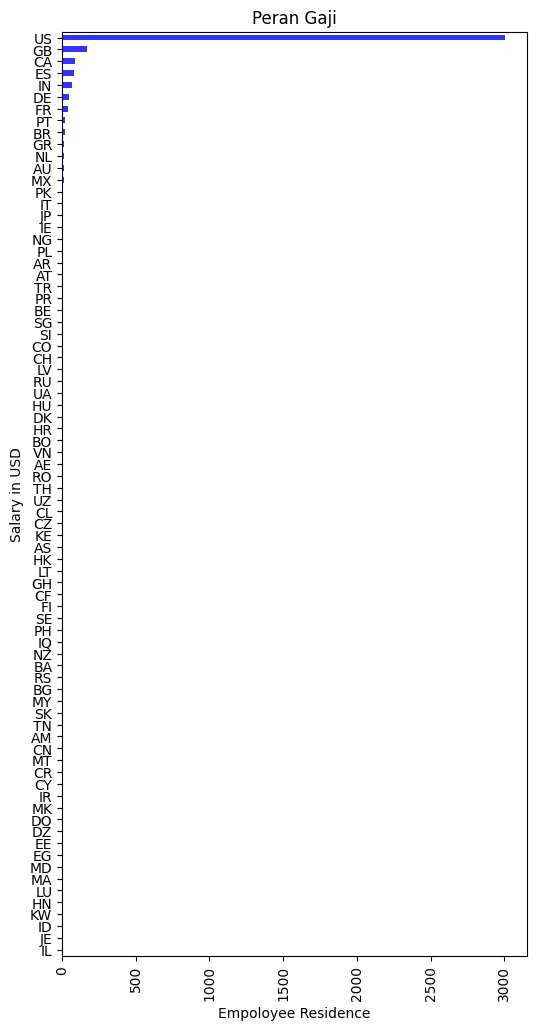

In [43]:
plt.figure(figsize=(6, 12))
avg_salary_by_title = df.groupby('employee_residence')['salary_in_usd'].count().sort_values(ascending=True)
avg_salary_by_title.plot(kind='barh', color='blue', alpha=0.8)
plt.title('Peran Gaji')
plt.xlabel('Empoloyee Residence')
plt.ylabel('Salary in USD')
plt.xticks(rotation=90)
plt.show()

Apakah ada korelasi antara ukuran perusahaan, jenis pekerjaan, dan remote_ratio dengan gaji?
- Melihat interaksi antar variabel tersebut untuk menentukan faktor-faktor yang paling berpengaruh pada gaji.

# **6. Analisis Deskriptif dan Prediktif**
Deskripsi statistik dari semua kolom untuk mendapatkan gambaran umum tentang dataset.
- Menyediakan insight awal dari distribusi data.

Model prediktif untuk memprediksi gaji berdasarkan variabel lainnya.
- Membangun model prediktif untuk memprediksi gaji berdasarkan pengalaman, lokasi, ukuran perusahaan, dan variabel lainnya.